In [15]:
import matplotlib.pyplot as plt
import numpy as np
np.set_printoptions(precision=2)

In [16]:
# Creating network, inicialization of parameters
# człowiek , ryba , ptak

import pandas as pd
import numpy as np
from Siec_plytka.init import init1
from Siec_plytka.dzialaj1 import calculate1, calculate2
from Siec_plytka.ucz1 import ucz1

examples = pd.read_csv('dane_uczace.csv')
examples = np.array(examples)

x_train = examples[:, :5]
y_train = examples[:, 5:]
print("Dane treningowe")
print(x_train)
print("Etykiety treningowe")
print(y_train)



Dane treningowe
[[ 4.    0.01  0.01 -1.   -1.5 ]
 [ 2.   -1.    2.    2.5   2.  ]
 [-1.    3.5   0.01 -2.    1.5 ]]
Etykiety treningowe
[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]


In [17]:
W_matrix = init1(5,3)  # 5 numbers in input, 3 neurons in layer1 (3 outputs)
print("Tak wyglądają zainicjalizowane wagi")
print(f"Wagi początkowe:\n {W_matrix}")
print(W_matrix.shape)

Tak wyglądają zainicjalizowane wagi
Wagi początkowe:
 [[ 0.05 -0.03  0.    0.08 -0.09]
 [ 0.03 -0.06 -0.05 -0.09 -0.07]
 [ 0.08 -0.06 -0.08  0.09 -0.02]]
(3, 5)


In [18]:
outputs_sigmoid = calculate1(W_matrix, x_train[0])
print(outputs_sigmoid)
print(len(y_train[0]))

[0.78 0.83 0.78]
3


In [19]:

#result1 = calculate1(W_matrix, x_train[0])
#print(calculate1(W_matrix,x_train))
print(f"x_train transpose: \n{np.transpose(x_train[0])} ")
min_error = 2e-3 # błąd który sieć ma osiągnąć


W_optimal, MSE = ucz1(W_matrix, x_train, y_train, 1000, min_error)
print("###############################################")
print(f"Wagi wytrenowane:\n {W_optimal}")
print(f"MSE 5 pierwszych błędów: {MSE[0:5]}")


x_train transpose: 
[ 4.    0.01  0.01 -1.   -1.5 ] 
result [0.78 0.83 0.78]
cost: [ 0.22 -0.83 -0.78]
TESTY
0.1
[[ 0.05 -0.03  0.    0.08 -0.09]
 [ 0.03 -0.06 -0.05 -0.09 -0.07]
 [ 0.08 -0.06 -0.08  0.09 -0.02]]
Koniec TESTOW
OBLICZANIE dj_dW:
expamples[random_sample]: [ 4.    0.01  0.01 -1.   -1.5 ]
derivative: [ 0.19 -0.59 -0.68]
Koniec
dj_dW: [[ 7.79e-02  1.95e-04  1.95e-04 -1.95e-02 -2.92e-02]
 [-2.37e-01 -5.92e-04 -5.92e-04  5.92e-02  8.88e-02]
 [-2.70e-01 -6.76e-04 -6.76e-04  6.76e-02  1.01e-01]]
_____________________________
cost [ 0.22 -0.83 -0.78]
cost.T [[ 0.22]
 [-0.83]
 [-0.78]]
[0.22]
result [0.07 0.62 0.26]
cost: [-0.07 -0.62  0.74]
TESTY
0.1
[[ 0.13 -0.03  0.    0.06 -0.12]
 [-0.21 -0.06 -0.05 -0.04  0.01]
 [-0.19 -0.06 -0.08  0.16  0.08]]
Koniec TESTOW
OBLICZANIE dj_dW:
expamples[random_sample]: [-1.    3.5   0.01 -2.    1.5 ]
derivative: [-0.02 -0.73  0.71]
Koniec
dj_dW: [[ 2.11e-03 -7.37e-03 -2.11e-05  4.21e-03 -3.16e-03]
 [ 7.32e-02 -2.56e-01 -7.32e-04  1.46e-01 -1.

In [20]:
print("---------------------------------")
print("Teraz przewiduję:")
# print(f"W optimal:\n {W_optimal}")
# print(f"x_train:\n  {x_train}")
# przewidywania = calculate2(W_optimal, x_train)
# print(przewidywania)


outputs_sigmoid = calculate1(W_optimal, x_train[0])
print(outputs_sigmoid)
outputs_sigmoid = calculate1(W_optimal, x_train[1])
print(outputs_sigmoid)
outputs_sigmoid = calculate1(W_optimal, x_train[2])
print(outputs_sigmoid)


---------------------------------
Teraz przewiduję:
[9.94e-01 5.81e-03 7.78e-04]
[0.01 1.   0.01]
[4.27e-03 2.83e-04 9.99e-01]


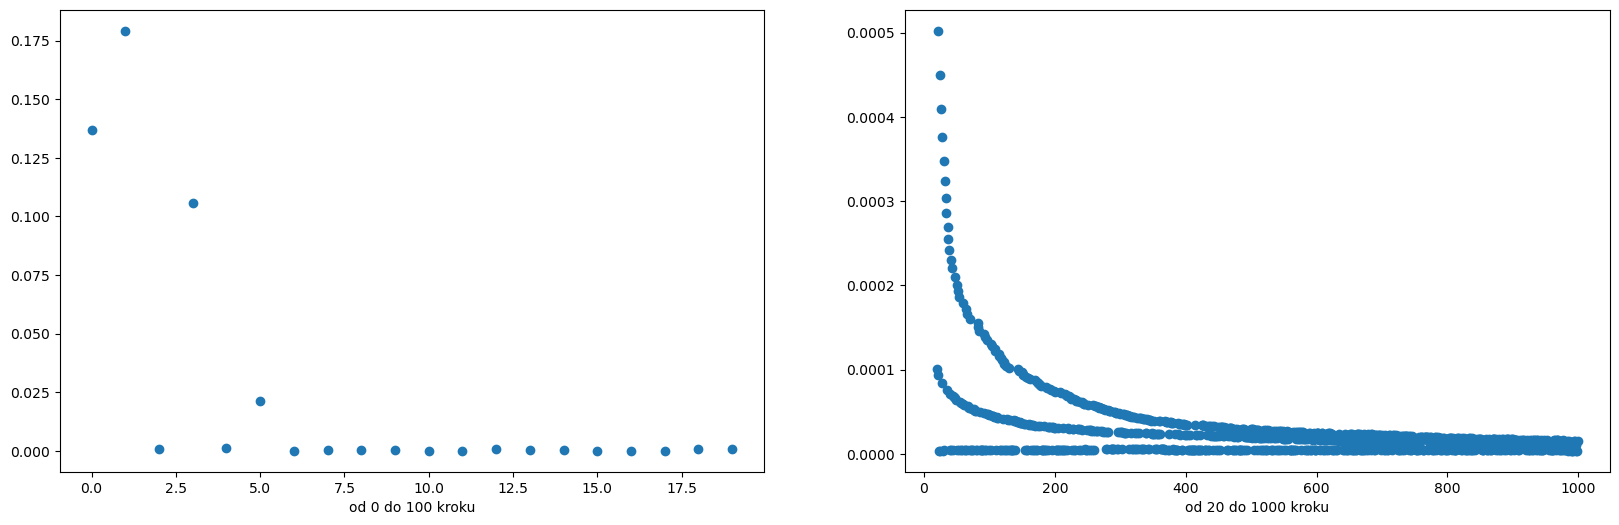

In [10]:
#MSE 
fig, ax = plt.subplots(1,2,figsize=(20,6))
krok = np.arange(1000)
ax[0].scatter(krok[0:20] , MSE[0:20])
ax[0].set_xlabel('od 0 do 100 kroku')
ax[1].scatter(krok[20:], MSE[20:] )
ax[1].set_xlabel('od 20 do 1000 kroku')
plt.show()



In [11]:
print("---------------------------------")
x_test = np.array([2, 0.2, 0.3, 0.1, 0.05])

przewidywania= calculate1(W_optimal, x_test)
print(przewidywania)

---------------------------------
[0.66342136 0.29529617 0.03071257]
